In [1]:
import scipy as sp
import scipy.interpolate
file = open("salt2_template_1.dat")
lines = file.readlines()
file.close()
    
xtemp = []
ytemp = []
ztemp = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])
    ytemp.append(co[1])
    ztemp.append(co[2])

In [2]:
import numpy as np

xtemp = np.array(xtemp, dtype=float)
ytemp = np.array(ytemp, dtype=float)
ztemp = np.array(ztemp, dtype=float)

In [3]:
print(xtemp)
print(ytemp)
print(ztemp)

[-20. -20. -20. ...  50.  50.  50.]
[2000. 2010. 2020. ... 9180. 9190. 9200.]
[0.         0.         0.         ... 0.01562876 0.01553518 0.01540527]


In [4]:
ztemp = ztemp

In [5]:
import scipy.interpolate as interp

gradex,gradey = np.meshgrid(np.linspace(min(xtemp),max(xtemp),71),np.linspace(min(ytemp),max(ytemp),721))

f = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='linear')


In [6]:
temp_listx = list(gradex[0])

idx_x = temp_listx.index(0)

temp_listy = []
for i in range(0,len(gradey)):
    
    
    temp_listy.append(gradey[i][0])
    

idx_y = temp_listy.index(4000)


z_temporary = np.reshape(ztemp, (len(gradex), len(gradex[0]))).T
max_value_temp = z_temporary[idx_x][idx_y]

In [7]:
max_value_temp

-0.001876776508

In [8]:
print(f)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.42449208e-05  1.45519933e-04 ...  1.94374702e-06
  -2.29328268e-06 -7.67180817e-06]
 [ 0.00000000e+00  1.37295382e-04  5.83421262e-04 ...  7.79290722e-06
  -9.19427217e-06 -3.07579580e-05]
 ...
 [ 0.00000000e+00  1.46130930e-02  6.20966927e-02 ...  2.86315981e-02
   2.23833788e-02  1.56287602e-02]
 [ 0.00000000e+00  1.50415401e-02  6.39173303e-02 ...  2.91389960e-02
   2.25999716e-02  1.55351761e-02]
 [ 0.00000000e+00  1.54644167e-02  6.57142968e-02 ...  2.96170484e-02
   2.27838144e-02  1.54052733e-02]]


In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0salt'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0salt'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n"

In [10]:
file = open("realM1.dat")
lines = file.readlines()
file.close()
    
xsub = []
ysub = []
zsub = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xsub.append(co[0])
    ysub.append(co[1])
    zsub.append(co[2])

In [11]:
xsub = np.array(xsub, dtype=float)
ysub = np.array(ysub, dtype=float)
zsub = np.array(zsub, dtype=float)

In [12]:
zsub = zsub

In [13]:
gradex,gradey = np.meshgrid(np.linspace(min(xsub),max(xsub),38),np.linspace(min(ysub),max(ysub),30))

fsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='nearest')

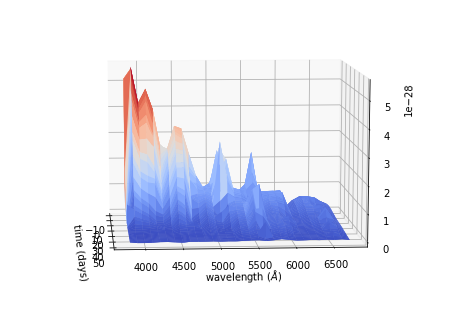

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0my'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

In [15]:
xx_temp = np.linspace(-10,50,61)
yy_temp = np.linspace(3800,6800,31)

In [16]:
gradex,gradey = np.meshgrid(xx_temp,yy_temp)

In [17]:
xx_temp

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

In [18]:
gradey

array([[3800., 3800., 3800., ..., 3800., 3800., 3800.],
       [3900., 3900., 3900., ..., 3900., 3900., 3900.],
       [4000., 4000., 4000., ..., 4000., 4000., 4000.],
       ...,
       [6600., 6600., 6600., ..., 6600., 6600., 6600.],
       [6700., 6700., 6700., ..., 6700., 6700., 6700.],
       [6800., 6800., 6800., ..., 6800., 6800., 6800.]])

In [19]:
len(zsub)

2700

In [20]:
temp_listx = list(gradex[0])

idx_x = temp_listx.index(0)

temp_listy = []
for i in range(0,len(gradey)):
    
    
    temp_listy.append(gradey[i][0])
    

idx_y = temp_listy.index(4000)


z_temporary = np.reshape(zsub, (45, len(gradex[0])-1)).T
max_value_sub = z_temporary[idx_x][idx_y]

In [21]:
supref = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='nearest')/max_value_temp

In [22]:
supsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='nearest')/max_value_sub

In [23]:
import math
xx = []
yy = []
zz = []
for i in range(0,len(xx_temp)):
    for j in range(0,len(yy_temp)):
        
        if math.isnan(supref[j][i]) == False and math.isnan(supsub[j][i]) == False and supref[j][i] != 0:
            
            xx.append(xx_temp[i])
            yy.append(yy_temp[j])
            zz.append((supref[j][i] - supsub[j][i])/supref[j][i])

In [24]:
zz

[1.041836345407397,
 1.4702807081044837,
 1.4743164867292617,
 1.786704883489771,
 1.6412248908936493,
 1.209178240196377,
 1.4333021526229806,
 1.564577910434423,
 1.2701074340673548,
 1.1624532770488998,
 1.1331686375226169,
 1.244731449846848,
 1.36929736652668,
 1.3341710530616389,
 1.1723305669294481,
 1.155272483206321,
 1.1347232140731724,
 1.2188268168465028,
 1.1516940835475458,
 1.2736215531935342,
 1.2736797635936872,
 1.2399092451261804,
 1.0705469283157956,
 1.0211633102759545,
 1.38110526891339,
 1.85095276969979,
 1.737357581062266,
 1.5684411008788721,
 1.4849567937363555,
 1.1949020315534382,
 1.0941421043133608,
 1.1038165227765415,
 1.623741348880399,
 1.5072848642330694,
 1.921047096278783,
 1.7136383014718932,
 1.1899007373747037,
 1.4376261786878126,
 1.5883837630248667,
 1.289248004194159,
 1.1726838442851157,
 1.1455437483830317,
 1.3010055073218316,
 1.4616585253896814,
 1.3905479439062138,
 1.1600071694366167,
 1.182923800855305,
 1.138994708990147,
 1.2652745

In [25]:
gradex,gradey = np.meshgrid(np.linspace(-10,45,56),np.linspace(4000,6000,39))

fcomp = interp.griddata((xx,yy),zz,(gradex,gradey),method='linear')

In [26]:
fcomp

array([[1.47431649, 1.50728486, 1.56743662, ..., 0.88314767, 0.87526491,
        0.86051813],
       [1.63873143, 1.72505446, 1.87917573, ..., 0.89502699, 0.8904483 ,
        0.8819392 ],
       [1.77904804, 1.91013084, 2.15190898, ..., 0.91138564, 0.9099019 ,
        0.90701018],
       ...,
       [1.24168664, 1.29946118, 1.41713901, ..., 1.33119476, 1.33121708,
        1.31282315],
       [1.15968499, 1.19167948, 1.26050412, ..., 1.21856393, 1.22078485,
        1.20630832],
       [1.07054693, 1.07467957, 1.09102638, ..., 1.08398178, 1.0877666 ,
        1.07789387]])

<IPython.core.display.Javascript object>


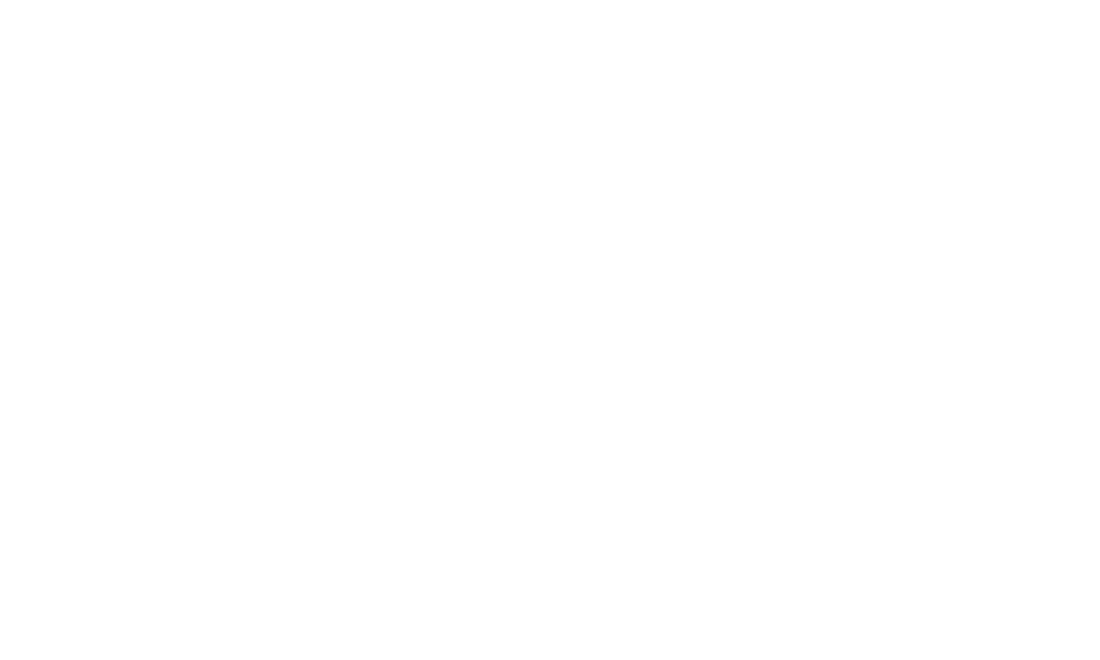

In [27]:
%matplotlib notebook

fig3=plt.figure(figsize=(10,6))
ax3=plt.axes(projection='3d')

surf=ax3.plot_surface(gradey, gradex, fcomp, alpha=1)
ax3.title.set_text('discrepancia')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('time')
ax3.set_xlim(3750, 7000)
ax3.set_ylim(-15, 40)
#ax3.set_zlim(-1, 1)
plt.show()

<IPython.core.display.Javascript object>


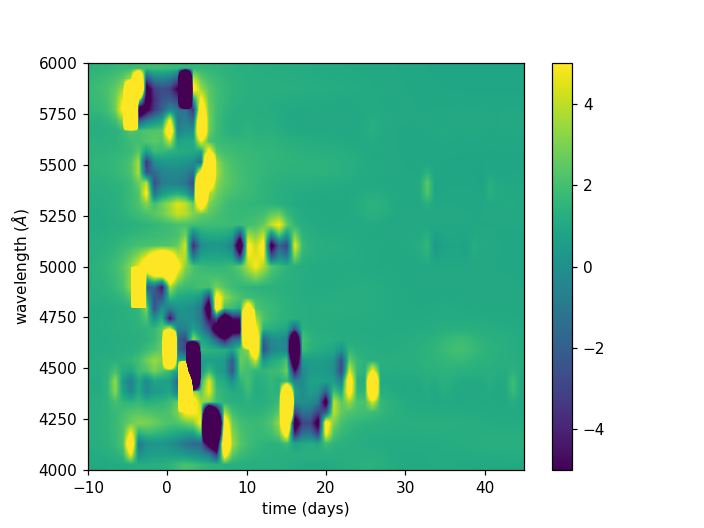

In [29]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(fcomp, extent=(np.amin(gradex), np.amax(gradex), np.amin(gradey), np.amax(gradey)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(-5,5)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()
